## Problem Statement

#### To predict the Sale price of houses based on their various features such as location, number of bedrooms and bathrooms, square footage, lot size, and other relevant factors.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer #importing necessary libraries 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import itertools

In [2]:
df = pd.read_csv('/content/train.csv') # reading the data

### EDA

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(7300, 81)

In [5]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage      1295
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

In [6]:
df.isnull().sum().sum()

34825

In [7]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0]) # only showing columns which have null values

LotFrontage     1295
Alley           6845
MasVnrType        40
MasVnrArea        40
BsmtQual         185
BsmtCond         185
BsmtExposure     190
BsmtFinType1     185
BsmtFinType2     190
Electrical         5
FireplaceQu     3450
GarageType       405
GarageYrBlt      405
GarageFinish     405
GarageQual       405
GarageCond       405
PoolQC          7265
Fence           5895
MiscFeature     7030
dtype: int64


In [8]:
df.describe() # we can find outliers here itself by checking difference between median and mean

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,7300.000000,7300.000000,6005.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7260.000000,7300.000000,...,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000,7300.000000
mean,3650.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,2107.472815,42.288979,24.276661,9978.529590,1.382618,1.112494,30.194627,20.639749,181.016312,455.973098,...,125.304446,66.237870,61.102399,29.309296,55.742135,40.166296,495.987063,2.702885,1.327731,79420.731849
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,1825.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,3650.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,5475.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,7300.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             7300 non-null   int64  
 1   MSSubClass     7300 non-null   int64  
 2   MSZoning       7300 non-null   object 
 3   LotFrontage    6005 non-null   float64
 4   LotArea        7300 non-null   int64  
 5   Street         7300 non-null   object 
 6   Alley          455 non-null    object 
 7   LotShape       7300 non-null   object 
 8   LandContour    7300 non-null   object 
 9   Utilities      7300 non-null   object 
 10  LotConfig      7300 non-null   object 
 11  LandSlope      7300 non-null   object 
 12  Neighborhood   7300 non-null   object 
 13  Condition1     7300 non-null   object 
 14  Condition2     7300 non-null   object 
 15  BldgType       7300 non-null   object 
 16  HouseStyle     7300 non-null   object 
 17  OverallQual    7300 non-null   int64  
 18  OverallC

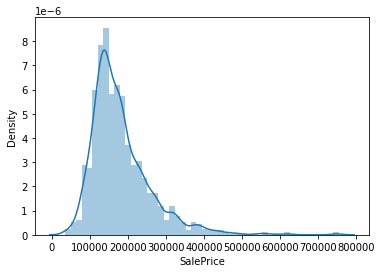



skewness: 1.881327
kurtosis: 6.515095


In [10]:
# Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
# A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
# Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

import warnings
warnings.filterwarnings("ignore")

#kernel density plot
sns.distplot(df.SalePrice)
plt.show()
print('\n')
print("skewness: %f" % df['SalePrice'].skew())
print("kurtosis: %f" % df ['SalePrice'].kurt())

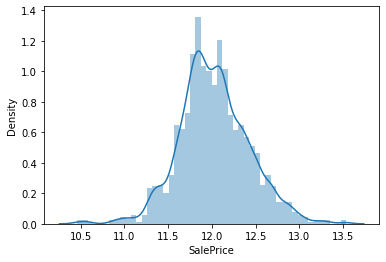

skewness: 0.121247
kurtosis: 0.804015


In [11]:
# log transformations used to transform skewed data to approximately confirm to normality.

# log transform the target 
df["SalePrice"] = np.log1p(df["SalePrice"])

#Kernel Density plot
sns.distplot(df.SalePrice);
plt.show()

print("skewness: %f" % df['SalePrice'].skew())
print("kurtosis: %f" % df ['SalePrice'].kurt())

In [12]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50)].index)
important_num_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

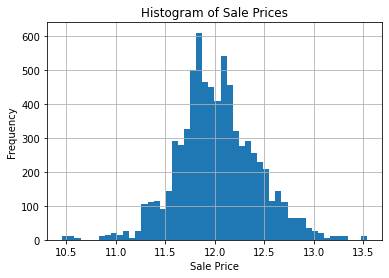

In [13]:
df['SalePrice'].hist(bins=50)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Prices')
plt.show() 
# Frequency - count of observations in each bin.
# This will help you identify if the target variable is normally distributed or if it has any outliers.

In [14]:
df = df.drop(['Alley','PoolQC','MiscFeature','Fence','GarageFinish','GarageFinish','Utilities','Condition1','Condition2','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtUnfSF','KitchenQual','KitchenQual','YrSold','SaleType'],axis = 1) 
# Dropping unnecessary columns along with columns having more than 80% null values

In [15]:
df.shape

(7300, 66)

In [16]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0]) # counting number of null values in each column

LotFrontage     1295
MasVnrType        40
MasVnrArea        40
BsmtQual         185
BsmtExposure     190
Electrical         5
FireplaceQu     3450
GarageType       405
GarageYrBlt      405
GarageQual       405
GarageCond       405
dtype: int64


In [17]:
num=df._get_numeric_data() 
num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,12.429220


In [18]:
num.fillna(method='ffill', inplace=True)

In [19]:
num_cols=pd.DataFrame((num),columns=num.columns)
num_cols.isnull().sum().sum()

0

In [20]:
# normalizing the numerical columns
num_cols = (num_cols - num_cols.min()) / (num_cols.max() - num_cols.min())
num_cols

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.581428
1,0.000137,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.536316
2,0.000274,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.604026
3,0.000411,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.451868
4,0.000548,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.640475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,0.999452,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.524453
7296,0.999589,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.583760
7297,0.999726,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,0.661265
7298,0.999863,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,...,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,0.456768


In [21]:
cat=df.drop(num,axis=1)
cat=cat.astype('category')
cat.head() # Taking categorical columns

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,NaN,Attchd,TA,TA,Y,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,...,Gd,Y,SBrkr,Typ,Gd,Detchd,TA,TA,Y,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal


In [22]:
cat.fillna(df.mode().iloc[0], inplace=True)

In [23]:
cat_data=pd.DataFrame((cat),columns=cat.columns)
cat_data.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageQual,GarageCond,PavedDrive,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,Gd,Attchd,TA,TA,Y,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,...,Gd,Y,SBrkr,Typ,Gd,Detchd,TA,TA,Y,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,...,Ex,Y,SBrkr,Typ,TA,Attchd,TA,TA,Y,Normal


In [24]:
cat_data.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtExposure     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
Functional       0
FireplaceQu      0
GarageType       0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleCondition    0
dtype: int64

In [25]:
cat_data.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
LotConfig         5
LandSlope         3
Neighborhood     25
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtExposure      4
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
Functional        7
FireplaceQu       5
GarageType        6
GarageQual        5
GarageCond        5
PavedDrive        3
SaleCondition     6
dtype: int64

In [26]:
cat_data["Neighborhood"].value_counts()

NAmes      1125
CollgCr     750
OldTown     565
Edwards     500
Somerst     430
Gilbert     395
NridgHt     385
Sawyer      370
NWAmes      365
SawyerW     295
BrkSide     290
Crawfor     255
Mitchel     245
NoRidge     205
Timber      190
IDOTRR      185
ClearCr     140
StoneBr     125
SWISU       125
Blmngtn      85
MeadowV      85
BrDale       80
Veenker      55
NPkVill      45
Blueste      10
Name: Neighborhood, dtype: int64

In [27]:
cat_data["Functional"].value_counts()

Typ     6800
Min2     170
Min1     155
Mod       75
Maj1      70
Maj2      25
Sev        5
Name: Functional, dtype: int64

In [28]:
print(cat_data.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleCondition'],
      dtype='object')


In [29]:
# onehot encoding scratch code 
# Loop through each categorical column in the DataFrame
for col in cat_data.columns:
    # Create a set of unique values for the column
    unique_vals = set(cat_data[col])
    # Create a dictionary to map each unique value to an integer
    val_to_int = {val: i for i, val in enumerate(unique_vals)}
    # Create a list to store the one-hot encoded values for each row
    encoded_col = []
    # Loop through each value in the column and append its one-hot encoded representation to the list
    for val in cat_data[col]:
        one_hot = [0] * len(unique_vals)
        one_hot[val_to_int[val]] = 1
        encoded_col.append(one_hot)
    # Convert the list of one-hot encoded values to a DataFrame and append it to the original DataFrame
    encoded_df = pd.DataFrame(encoded_col, columns=[col + '_' + str(val) for val in unique_vals])
    cat_data = pd.concat([cat_data, encoded_df], axis=1)
    # Drop the original categorical column from the DataFrame
    cat_data = cat_data.drop(col, axis=1)


In [30]:
cat_data.head()

,MSZoning_FV,MSZoning_C (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR2,LotShape_Reg,LotShape_IR3,...,GarageCond_Gd,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Family,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Alloca,SaleCondition_AdjLand,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [31]:
#dummification for categorical columns
# g_d=pd.get_dummies(cat_data)

In [32]:
# g_d.head()

In [33]:
cat_data.isnull().sum().sum()

0

Text(0, 0.5, 'SalePrice')

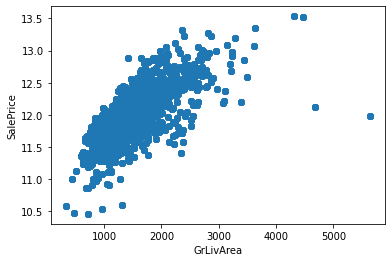

In [34]:
import seaborn as sns
plt.scatter(num['GrLivArea'], num['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
#This will help you identify if there is a linear relationship between these two variables.

Text(0, 0.5, 'Sale Price')

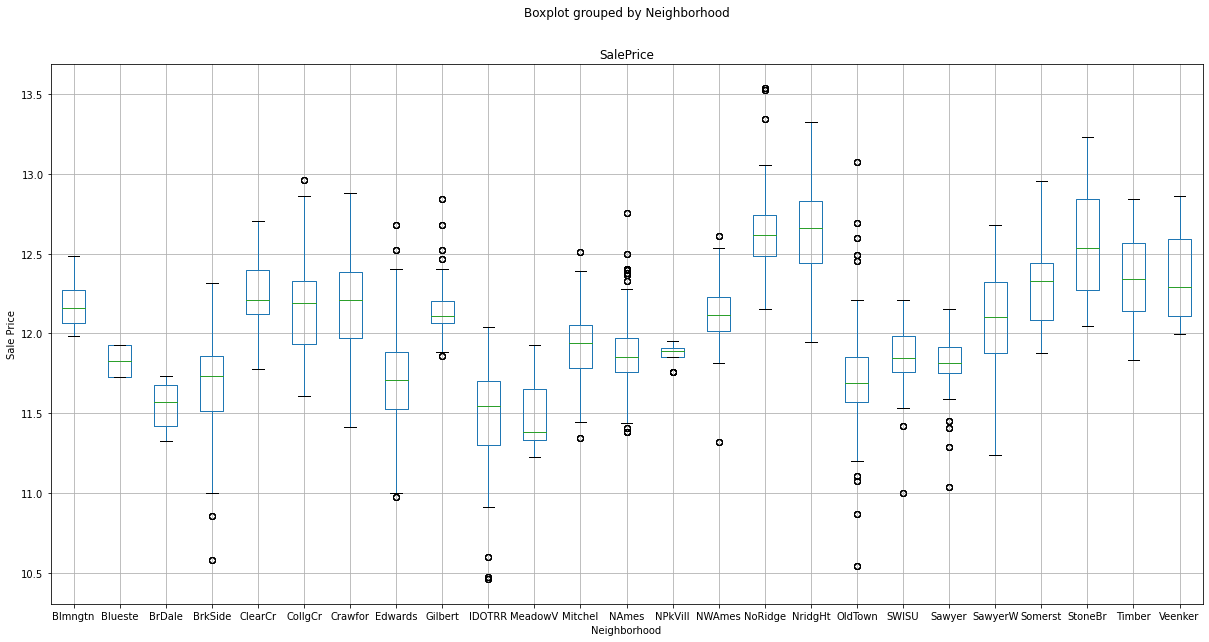

In [35]:
df.boxplot(column='SalePrice', by='Neighborhood', figsize=(20, 10))
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price') #This will help you identify if there are any significant differences in sale prices between neighborhoods.

Text(0, 0.5, 'Sale Price')

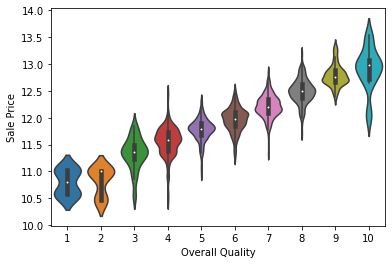

In [36]:
sns.violinplot(x='OverallQual', y='SalePrice', data=num, scale='width')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price') #shows density at given y value

In [37]:
num_cols.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.581428
1,0.000137,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.536316
2,0.000274,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.604026
3,0.000411,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.451868
4,0.000548,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.640475


In [38]:
cat_data.head()

,MSZoning_FV,MSZoning_C (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR2,LotShape_Reg,LotShape_IR3,...,GarageCond_Gd,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Family,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Alloca,SaleCondition_AdjLand,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [39]:
# concating the numerical column and updated categorical column 
final_df=pd.concat([num_cols,cat_data],axis=1)
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCond_Gd,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Family,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Alloca,SaleCondition_AdjLand,SaleCondition_Partial
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,...,0,0,0,1,0,0,1,0,0,0
1,0.000137,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,...,0,0,0,1,0,0,1,0,0,0
2,0.000274,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,...,0,0,0,1,0,0,1,0,0,0
3,0.000411,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,...,0,0,0,1,0,1,0,0,0,0
4,0.000548,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,...,0,0,0,1,0,0,1,0,0,0


In [40]:
final_df.shape

(7300, 224)

In [41]:
final_df['SalePrice']

0       0.581428
1       0.536316
2       0.604026
3       0.451868
4       0.640475
          ...   
7295    0.524453
7296    0.583760
7297    0.661265
7298    0.456768
7299    0.468843
Name: SalePrice, Length: 7300, dtype: float64

In [42]:
null_counts = final_df.isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


In [43]:
final_df.isnull().sum().sum()

0

In [44]:
# Reset the index
final_df = final_df.reset_index(drop=True)

## Train_Test_split

In [45]:
## Dividing Independent and Dependent Variables
X = final_df.drop('SalePrice', axis=1)
y = final_df['SalePrice']

In [46]:
# Split the data into training and validation sets
train_size = int(len(final_df) * 0.7) # 70% of the data is used for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print the size of each set
print('Training data:', len(X_train))
print('test data:', len(X_test))

Training data: 5110
test data: 2190


## Model Building For Train Data

In [64]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=2):
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)
        
    def build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        
        if depth == self.max_depth or n_samples == 5:
            return np.mean(y)
        
        feature_idxs = np.random.choice(n_features, size=2, replace=False)
        best_feature, best_threshold = self.find_best_split(X, y, feature_idxs)
        
        if best_threshold is None:
            return np.mean(y)
        
        left_idxs = X[:, best_feature] < best_threshold
        right_idxs = X[:, best_feature] >= best_threshold
        
        left_tree = self.build_tree(X[left_idxs], y[left_idxs], depth+1)
        right_tree = self.build_tree(X[right_idxs], y[right_idxs], depth+1)
        
        return (best_feature, best_threshold, left_tree, right_tree)
    
    def find_best_split(self, X, y, feature_idxs):
        best_score = float('inf')
        best_feature = None
        best_threshold = None
        
        for feature in feature_idxs:
            thresholds = np.unique(X[:, feature])
            
            for threshold in thresholds:
                left_idxs = X[:, feature] < threshold
                right_idxs = X[:, feature] >= threshold
                
                if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
                    continue
                
                score = self.split_score(y, y[left_idxs], y[right_idxs])
                
                if score < best_score:
                    best_score = score
                    best_feature = feature
                    best_threshold = threshold
                    
        return best_feature, best_threshold
    
    def split_score(self, y, y_left, y_right):
        p_left = len(y_left) / len(y)
        p_right = len(y_right) / len(y)
        
        score = p_left * np.var(y_left) + p_right * np.var(y_right)
        
        return score
    
    def predict(self, X):
        return np.array([self.traverse_tree(x, self.tree) for x in X])
    
    def traverse_tree(self, x, node):
        if isinstance(node, float):
            return node
        
        feature, threshold, left_tree, right_tree = node
        
        if x[feature] < threshold:
            if isinstance(left_tree,float):
                return left_tree
            else:
                return self.traverse_tree(x, right_tree)
        else:
            if isinstance(right_tree,float):
                return right_tree
            else:
                return self.traverse_tree(x,right_tree)
        
class RandomForestRegressor:
    def __init__(self, n_trees=15, max_depth=2, subsample_size=0.5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_size = subsample_size
        self.trees = []
        
    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            n_samples = len(X)
            subsample_size = int(self.subsample_size * n_samples)
            subsample_idxs = np.random.choice(range(n_samples), size=subsample_size, replace=True)
            X_sub = X.iloc[subsample_idxs]
            y_sub = y.iloc[subsample_idxs]
            tree.fit(X_sub.values, y_sub.values)
            #tree.fit(X[subsample_idxs], y[subsample_idxs])
            self.trees.append(tree)
            
    def predict(self, X):
        if isinstance(X, (int, float)):
            X = np.array([[X]])
        elif isinstance(X, pd.Series):
            X = X.values.reshape(1, n_features)
        else:
            X = X.values
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

In [65]:
rf = RandomForestRegressor(n_trees=15, max_depth=2, subsample_size=0.5)
rf.fit(X_train, y_train)

In [66]:
# Make predictions on the train set
y_train_pred = rf.predict(X_train)

In [67]:
# Make predictions on the train set
y_train_pred = rf.predict(X_train)

# Calculate mean absolute error
mae_train = np.abs(y_train.values - y_train_pred).mean()

# Calculate mean absolute error
print("Mean Absolute Error:", mae_train)

Mean Absolute Error: 0.10717587938829808


In [68]:
# Make predictions on the test set
y_test_pred = rf.predict(X_test)

# Calculate mean absolute error
mae_test = np.abs(y_test.values - y_test_pred).mean()

# Calculate mean absolute error
print("Mean Absolute Error:", mae_test)

Mean Absolute Error: 0.10457987431077029


TUNING TECHNIQUES

In [57]:
class GridSearchCV:
    def __init__(self, estimator, param_grid, cv=5):
        self.estimator = estimator
        self.param_grid = param_grid
        self.cv = cv
    
    def fit(self, X, y):
        param_combinations = list(itertools.product(*self.param_grid.values()))
        best_params = None
        best_score = float('inf')
        for params in param_combinations:
            param_dict = dict(zip(self.param_grid.keys(), params))
            estimator = self.estimator(**param_dict)
            scores = []
            n_samples = len(X)
            fold_size = n_samples // self.cv
            for i in range(self.cv):
                start = i * fold_size
                end = (i+1) * fold_size if i != self.cv-1 else n_samples
                X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
                y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
                X_test = X.iloc[start:end]
                y_test = y.iloc[start:end]
                estimator.fit(X_train, y_train)
                y_pred = estimator.predict(X_test)
                score = np.mean((y_test - y_pred)**2)
                scores.append(score)
            avg_score = np.mean(scores)
            if avg_score < best_score:
                best_score = avg_score
                best_params = param_dict
        self.best_params_ = best_params
        self.best_estimator_ = self.estimator(**best_params)
        self.best_estimator_.fit(X, y)
        self.cv_results_ = {'params': [], 'mean_test_score': []}
        for params in param_combinations:
            param_dict = dict(zip(self.param_grid.keys(), params))
            self.cv_results_['params'].append(param_dict)
            estimator = self.estimator(**param_dict)
            scores = []
            n_samples = len(X)
            fold_size = n_samples // self.cv
            for i in range(self.cv):
                start = i * fold_size
                end = (i+1) * fold_size if i != self.cv-1 else n_samples
                X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
                y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
                X_test = X.iloc[start:end]
                y_test = y.iloc[start:end]
                estimator.fit(X_train, y_train)
                y_pred = estimator.predict(X_test)
                score = np.mean((y_test - y_pred)**2)
                scores.append(score)
            avg_score = np.mean(scores)
            self.cv_results_['mean_test_score'].append(avg_score)
        return self

# Define the parameter grid
param_grid = {
    'n_trees': [10, 20],
    'max_depth': [2, 4],
    'subsample_size': [0.5, 0.7]
}

# Define the estimator
estimator = RandomForestRegressor

# Perform grid search
grid_search = GridSearchCV(estimator, param_grid)
grid_search.fit(X_train, y_train)

# Print results
print("Best parameters:", grid_search.best_params_)
print("Best score:", np.mean((y_test - grid_search.best_estimator_.predict(X_test))**2))

Best parameters: {'n_trees': 20, 'max_depth': 2, 'subsample_size': 0.5}
Best score: 0.014521162597117786


In [60]:
rf = RandomForestRegressor(n_trees=20, max_depth=2, subsample_size=0.5)
rf.fit(X_train, y_train)

In [61]:
# Make predictions on the train set
y_train_pred = rf.predict(X_train)

# Calculate mean absolute error
mae_train = np.abs(y_train.values - y_train_pred).mean()

# Calculate mean absolute error
print("Mean Absolute Error:", mae_train)

Mean Absolute Error: 0.10007246386996592


In [62]:
# Make predictions on the test set
y_test_pred = rf.predict(X_test)

# Calculate mean absolute error
mae_test = np.abs(y_test.values - y_test_pred).mean()

# Calculate mean absolute error
print("Mean Absolute Error:", mae_test)

Mean Absolute Error: 0.09737147833126794


## Kaggle link for dataset

https://www.kaggle.com/code/emrearslan123/house-price-prediction/data